In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1. Labels

In [3]:
df_train = pd.read_csv("TrainSet.txt", sep="\t")
df_train

,Compound Identifier,Odor,Replicate,Intensity,Dilution,subject #,INTENSITY/STRENGTH,VALENCE/PLEASANTNESS,BAKERY,SWEET,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",1,7,62.0,0.0,0.0,...,0.0,0.0,0.0,21.0,0.0,0.0,0.0,0.0,0.0,0.0
1,126,4-Hydroxybenzaldehyde,NaN,high,1/10,1,37,60.0,0.0,72.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",2,55,89.0,0.0,33.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0
3,126,4-Hydroxybenzaldehyde,NaN,high,1/10,2,64,71.0,0.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0
4,126,4-Hydroxybenzaldehyde,NaN,low,"1/1,000",3,89,68.0,0.0,62.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35079,6999977,Butyl (S)-(-)-lactate,NaN,high,"1/1,000",47,42,77.0,56.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35080,6999977,Butyl (S)-(-)-lactate,NaN,low,"1/100,000",48,0,72.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35081,6999977,Butyl (S)-(-)-lactate,NaN,high,"1/1,000",48,22,96.0,0.0,58.0,...,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27.0
35082,6999977,Butyl (S)-(-)-lactate,NaN,low,"1/100,000",49,72,9.0,0.0,0.0,...,0.0,0.0,19.0,9.0,0.0,2.0,0.0,0.0,0.0,3.0


In [4]:
len(np.unique(df_train["Compound Identifier"]))

338

In [5]:
# total number of molecules: OK
(len(np.unique(df_train["Compound Identifier"])) +69 + 69) # 69 molecules for leaderboard and 69 for unavailable test set

476

In [6]:
len(np.unique(df_train["subject #"]))

49

In [8]:
df_LB = pd.read_csv("LBs1.txt", sep="\t")
df_LB

,#oID,individual,descriptor,value
0,243,1,INTENSITY/STRENGTH,73.0
1,454,1,INTENSITY/STRENGTH,57.0
2,679,1,INTENSITY/STRENGTH,0.0
3,1030,1,INTENSITY/STRENGTH,0.0
4,1060,1,INTENSITY/STRENGTH,53.0
...,...,...,...,...
70996,5355850,49,CHEMICAL,0.0
70997,5363233,49,CHEMICAL,12.0
70998,5367698,49,CHEMICAL,0.0
70999,6114390,49,CHEMICAL,0.0


In [9]:
len(np.unique(df_LB["#oID"])) # indeed 69 molecules in leaderboard

69

In [10]:
# there are two dilutions
d1, d2 = df_train.Dilution[1], df_train.Dilution[2]
d1, d2

('1/10', '1/1,000 ')

'INTENSITY/STRENGTH' and 'VALENCE/PLEASANTNESS' are really regression values between 0 and 100, rather distributed

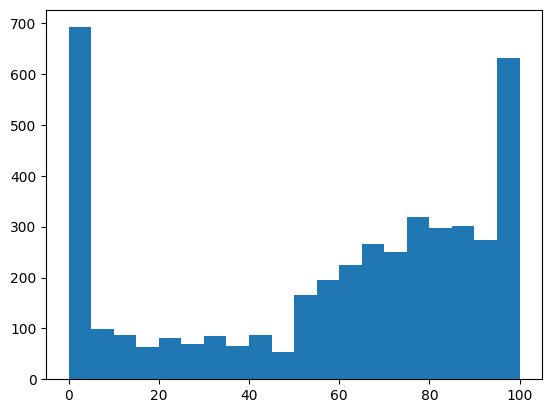

In [11]:
plt.hist(df_train['INTENSITY/STRENGTH'][df_train.Dilution==d1], bins=20);

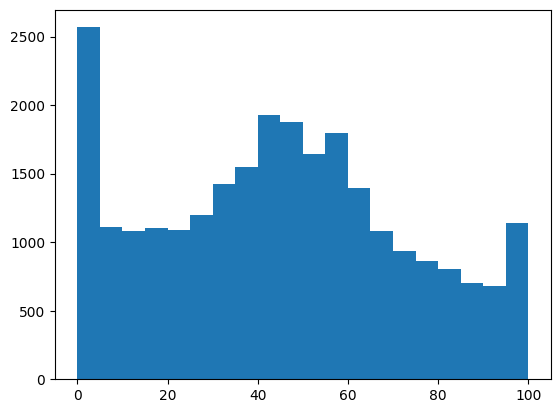

In [12]:
plt.hist(df_train['VALENCE/PLEASANTNESS'], bins=20);

Descriptors such as bakery etc can be easier devided in rather present or rather unpresent

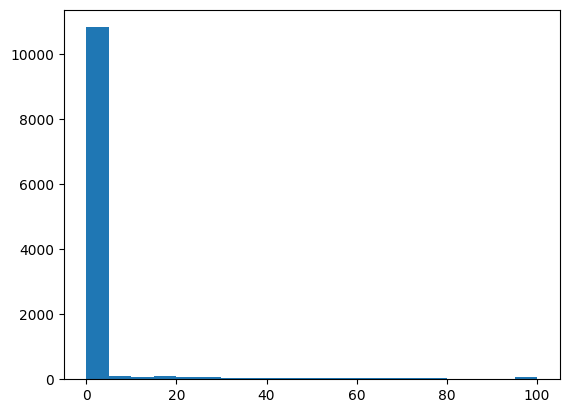

In [13]:
plt.hist(df_train['BAKERY'][df_train.Dilution==d2], bins=20);

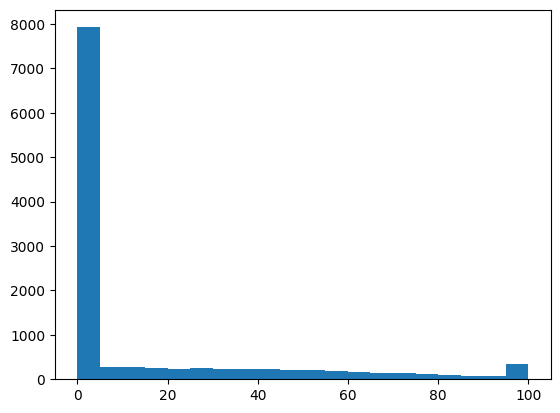

In [14]:
plt.hist(df_train['SWEET'][df_train.Dilution==d2], bins=20);

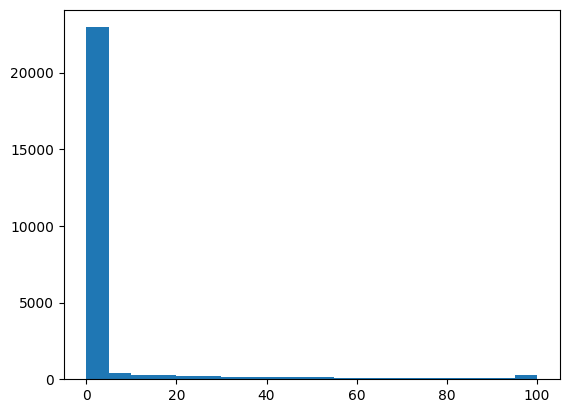

In [15]:
plt.hist(df_train['FRUIT'], bins=20);

For the more specific flavour descriptors (not intensity and pleasantness), it seems more reasonable to have classed undetected (0) and detected (1). We will binarize the scores using a threshold. For simplicity we will just average over the dilutions. Not all training molecules have been tested in both dilutions. The test labels have no different dilutions. Here we filter the data set on our specific flavour descriptors

In [16]:
columns = ['Compound Identifier', 'subject #', 'Dilution', 'BAKERY', 
       'SWEET', 'FRUIT', 'FISH', 'GARLIC', 'SPICES', 'COLD', 'SOUR', 'BURNT',
       'ACID', 'WARM', 'MUSKY', 'SWEATY', 'AMMONIA/URINOUS', 'DECAYED', 'WOOD',
       'GRASS', 'FLOWER', 'CHEMICAL']
df_train = df_train[columns]
# averaging over dilution
df_train = df_train.groupby(['Compound Identifier', 'subject #'], as_index=False).mean() #[df.columns]
df_train

/var/folders/47/tqsl_skx6ml299bcyhpslmr80000gn/T/ipykernel_40004/2149351912.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train = df_train.groupby(['Compound Identifier', 'subject #'], as_index=False).mean() #[df.columns]


,Compound Identifier,subject #,BAKERY,SWEET,FRUIT,FISH,GARLIC,SPICES,COLD,SOUR,...,ACID,WARM,MUSKY,SWEATY,AMMONIA/URINOUS,DECAYED,WOOD,GRASS,FLOWER,CHEMICAL
0,126,1,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,10.5,0.0,0.0,0.0,0.0,0.0,0.0
1,126,2,0.0,21.0,1.5,0.0,0.0,7.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0
2,126,3,0.0,62.0,0.0,0.0,0.0,35.0,0.0,0.0,...,0.0,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,126,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,0.0
4,126,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16557,6999977,45,22.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16558,6999977,46,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
16559,6999977,47,56.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16560,6999977,48,0.0,29.0,3.5,0.0,0.0,0.0,0.0,0.0,...,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13.5


Text(0, 0.5, 'descriptors')

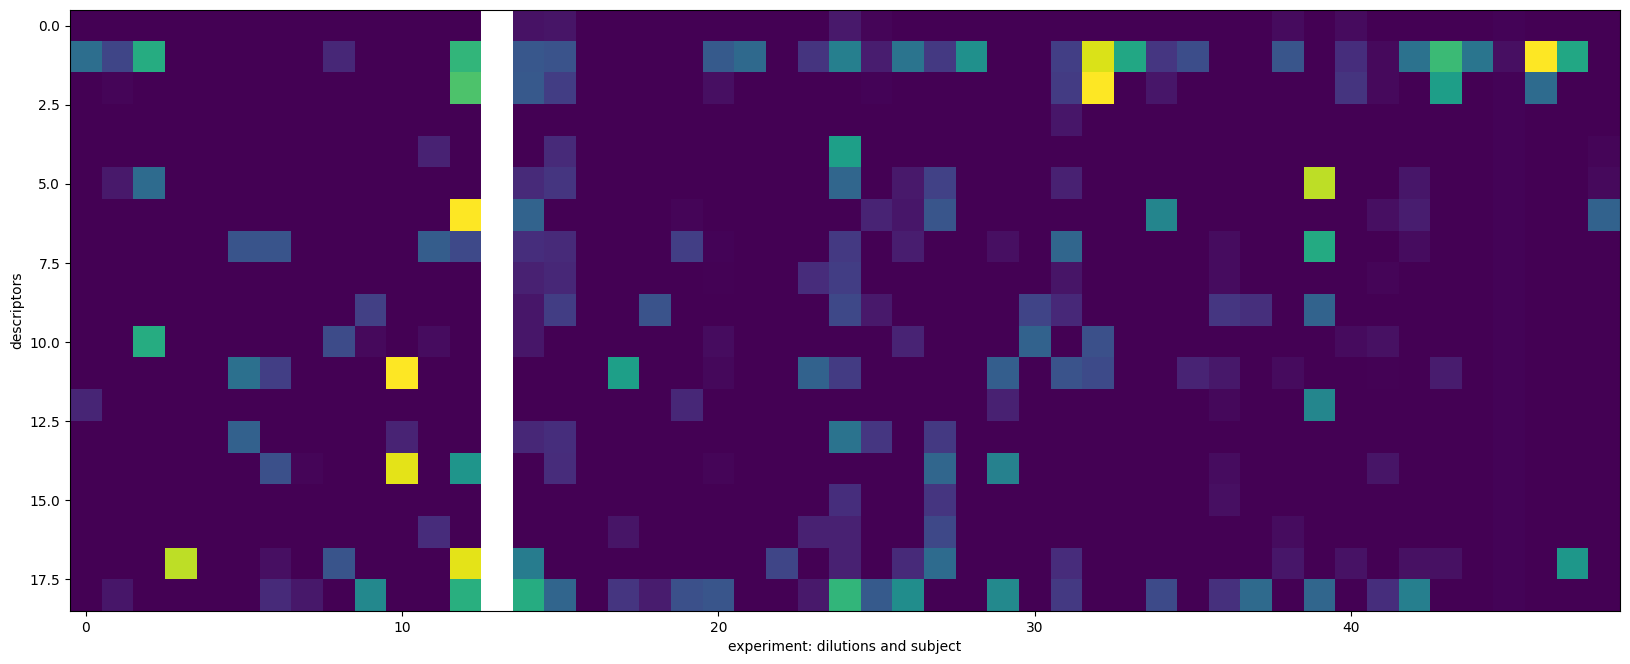

In [17]:
# here another visulaization of the scores for one molecule

# y-axis: the descriptors (19)
# x-axis: the experiments (49 individuals; averaged over 0-1-2 dilutions)

# Note that thee different individuals assign different flavour profiles in terms of the desriptors, for this molecule

molecule_index=0

molecule = np.unique(df_train["Compound Identifier"])[molecule_index]
A = np.array(df_train[df_train["Compound Identifier"]==molecule])[:,2:]
plt.figure(figsize=(20,30))
plt.imshow(A.transpose())
plt.xlabel("experiment: dilutions and subject")
plt.ylabel("descriptors")

In [18]:
A.shape

(49, 19)

We bring the train and test labels in the same format, and concatenate save them.

In [19]:
X = []
for i in range(len(df_train)):
    for j in range(2,len(df_train.columns)):
        X.append([df_train.iloc[i,0], df_train.iloc[i,1], df_train.columns[j], df_train.iloc[i,j]])
df = pd.DataFrame(X, columns=["Compound", "Subject", "Descriptor", "value"]).drop_duplicates()
df

,Compound,Subject,Descriptor,value
0,126,1,BAKERY,0.0
1,126,1,SWEET,36.0
2,126,1,FRUIT,0.0
3,126,1,FISH,0.0
4,126,1,GARLIC,0.0
...,...,...,...,...
314673,6999977,49,DECAYED,1.0
314674,6999977,49,WOOD,0.0
314675,6999977,49,GRASS,0.0
314676,6999977,49,FLOWER,0.0


In [20]:
df_LB = df_LB[(df_LB.descriptor!="INTENSITY/STRENGTH") & (df_LB.descriptor!="VALENCE/PLEASANTNESS")]
df_LB.columns = df.columns
df_LB

,Compound,Subject,Descriptor,value
138,243,1,BAKERY,0.0
139,454,1,BAKERY,0.0
140,679,1,BAKERY,0.0
141,1030,1,BAKERY,0.0
142,1060,1,BAKERY,0.0
...,...,...,...,...
70996,5355850,49,CHEMICAL,0.0
70997,5363233,49,CHEMICAL,12.0
70998,5367698,49,CHEMICAL,0.0
70999,6114390,49,CHEMICAL,0.0


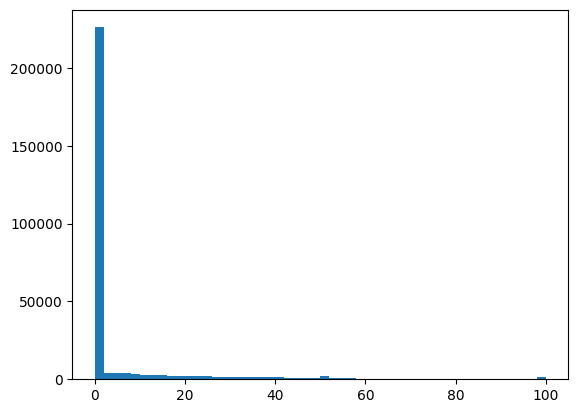

In [21]:
plt.hist(df.value, bins=50);

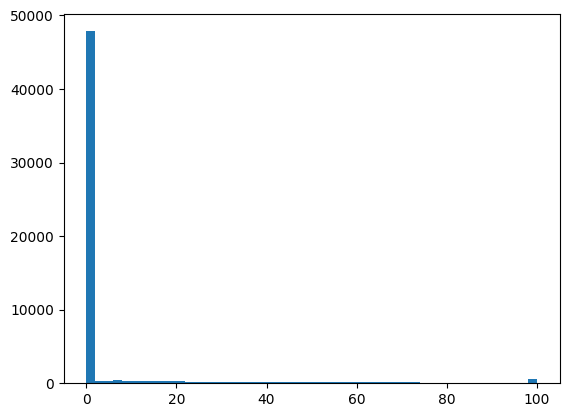

In [22]:
plt.hist(df_LB.value, bins=50);

In [23]:
69*49*19

64239

# Sub project 1
a threshold is chosen and train and test set are saved

In [24]:
th = 10
df[df.value>th][["Compound", "Subject", "Descriptor"]].to_csv("d1_train", index=False)
df_LB[df_LB.value>th][["Compound", "Subject", "Descriptor"]].to_csv("d1_test", index=False)

# Sub project 2

We redefine the simple version : averaging over all individuals

In [25]:
df_simple = df.groupby(["Compound", "Descriptor"], as_index=False).mean()[df.columns]
df_LB_simple = df_LB.groupby(["Compound", "Descriptor"], as_index=False).mean()[df_LB.columns]

df_simple

,Compound,Subject,Descriptor,value
0,126,25.0,ACID,3.989583
1,126,25.0,AMMONIA/URINOUS,2.843750
2,126,25.0,BAKERY,0.541667
3,126,25.0,BURNT,1.302083
4,126,25.0,CHEMICAL,14.114583
...,...,...,...,...
6417,6999977,25.0,SPICES,3.337209
6418,6999977,25.0,SWEATY,3.651163
6419,6999977,25.0,SWEET,14.151163
6420,6999977,25.0,WARM,5.383721


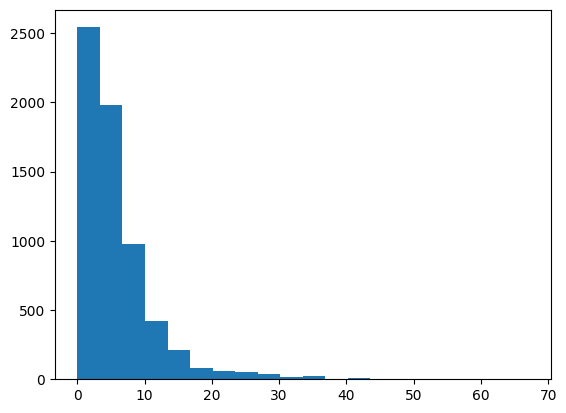

In [26]:
plt.hist(df_simple.value, bins=20);

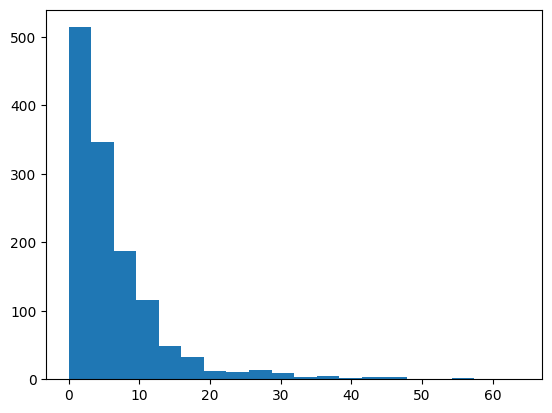

In [27]:
plt.hist(df_LB_simple.value, bins=20);

Try a binarization threshold (th2) and check new number of descriptors per molecule, and chech whether all molecules and descriptors are still present. Threshold should be low enough such that all molecules and al descriptors are still present, but also high enough such that not every molecule is positive on all descriptors.

In [28]:
th2=5
df_simple_bin = df_simple[df_simple.value>th2]
df_LB_simple_bin = df_LB_simple[df_LB_simple.value>th2]

In [29]:
# for the test set

print(len(np.unique(df_LB_simple_bin.Compound))/len(np.unique(df_LB_simple.Compound)))
print(len(np.unique(df_LB_simple_bin.Descriptor))/len(np.unique(df_LB_simple.Descriptor)))

# average number of descriptors per compound:
len(df_LB_simple_bin) / len(np.unique(df_LB_simple_bin.Compound) )

1.0
1.0


8.478260869565217

In [30]:
# for the training set

print(len(np.unique(df_simple_bin.Compound))/len(np.unique(df_simple.Compound)))
print(len(np.unique(df_simple_bin.Descriptor))/len(np.unique(df_simple.Descriptor)))

# average number of descriptors per compound:
len(df_simple_bin) / len(np.unique(df_simple_bin.Compound) )

1.0
1.0


8.103550295857989

In [31]:
df_simple_bin[["Compound", "Descriptor"]].to_csv("d2_train", index=False) 
df_LB_simple_bin[["Compound", "Descriptor"]].to_csv("d2_test", index=False)

# 2. Drug representations

In [32]:
df_drugs = pd.read_csv("molecular_descriptors_data.txt", "\t")
df_drugs

/var/folders/47/tqsl_skx6ml299bcyhpslmr80000gn/T/ipykernel_40004/754811998.py:1: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only.
  df_drugs = pd.read_csv("molecular_descriptors_data.txt", "\t")


,CID,complexity from pubmed,MW,AMW,Sv,Se,Sp,Si,Mv,Me,...,Psychotic-80,Psychotic-50,Hypertens-80,Hypertens-50,Hypnotic-80,Hypnotic-50,Neoplastic-80,Neoplastic-50,Infective-80,Infective-50
0,126,93.1,122.13,8.142,10.010,15.305,10.193,16.664,0.667,1.020,...,0,0,0,0,0,0,0,0,0,0
1,176,31.0,60.06,7.508,4.483,8.422,4.432,9.249,0.560,1.053,...,0,0,0,0,0,0,0,0,0,0
2,177,10.3,44.06,6.294,3.768,7.095,3.977,8.040,0.538,1.014,...,0,0,0,0,0,0,0,0,0,0
3,180,26.3,58.09,5.809,5.295,9.978,5.739,11.455,0.530,0.998,...,0,0,0,0,0,0,0,0,0,0
4,196,114.0,146.16,7.308,11.493,20.727,11.625,22.914,0.575,1.036,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
471,6114390,344.0,282.36,7.240,24.886,38.934,26.216,43.365,0.638,0.998,...,0,0,1,0,0,0,1,0,1,0
472,6429333,152.0,146.20,6.962,13.349,20.745,14.261,23.285,0.636,0.988,...,0,0,0,0,0,0,0,0,1,0
473,6999977,101.0,146.21,6.092,12.832,24.167,13.693,27.535,0.535,1.007,...,0,0,0,0,0,0,0,0,0,0
474,10857465,322.0,236.44,5.254,24.090,43.698,27.114,51.022,0.535,0.971,...,0,0,1,0,1,0,1,0,1,0


# 2.1 "Dragon"

In [34]:
from sklearn.preprocessing import StandardScaler
scaler =  StandardScaler()
df_drugs.iloc[:,1:] = scaler.fit_transform(df_drugs.iloc[:,1:])
df_drugs = df_drugs.fillna(0)
df_drugs.to_csv("Dragon", index=False)
df_drugs

ModuleNotFoundError: No module named 'sklearn'

# 2.2 "Smiles"

In [35]:
from pubchempy import Compound as cp

In [36]:
compounds = [cp.from_cid(int(df_drugs.CID[i])) for i in range(len(df_drugs))]

In [37]:
len(compounds)

476

In [38]:
df_drug_smiles = pd.DataFrame(np.asarray([np.array(df_drugs.CID), [compounds[i].canonical_smiles for i in range(len(compounds))]]).transpose(), columns=["CID", "canonical_smiles"])
df_drug_smiles.to_csv("Smiles", index=False)
df_drug_smiles

,CID,canonical_smiles
0,126,C1=CC(=CC=C1C=O)O
1,176,CC(=O)O
2,177,CC=O
3,180,CC(=O)C
4,196,C(CCC(=O)O)CC(=O)O
...,...,...
471,6114390,CC=CC1=CC(=C(C=C1)OC(=O)CC2=CC=CC=C2)OC
472,6429333,CC=C(C=O)C1=CC=CC=C1
473,6999977,CCCCOC(=O)C(C)O
474,10857465,CC1(CCCC2(C1CCC3(C2CCO3)C)C)C


# 2.3 Fingerprints

In [39]:
from tdc.chem_utils import MolConvert
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

ModuleNotFoundError: No module named 'tdc'

In [ ]:
df_drug_fingerprints = pd.DataFrame(np.asarray([np.array(AllChem.GetMorganFingerprintAsBitVect(Chem.MolFromSmiles(compounds[i].canonical_smiles),2,nBits=1024)) for i in range(len(compounds))]), index=df_drugs.CID)
df_drug_fingerprints.to_csv("Fingerprints")
df_drug_fingerprints